# <!-- TITLE --> __``` SEMANTIC IMAGE SEGMENTATION ```__
#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023
<img width="600px" height="400px" src="images/image3_seg.png"></img>

## __```This notebook is only used for image predictions```__


> For video predictions please go [here](https://vision-api.streamlit.app/)

In [1]:
from yolo.utils.tools import read_classes, read_anchors
from yolo.utils.tools import preprocess_image
from model_body.url import url_img_read
import pandas as pd 
from skimage.transform import resize
import seaborn as sns
from yolo.utils.tools import get_colors_for_classes
import random
from yolov8_ops.yolov8_seg import demo_seg
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from random import sample
import numpy as np 
%matplotlib inline

#### __```Image Path here```__

In [4]:
path = "https://arc-anglerfish-eu-central-1-prod-leparisien.s3.amazonaws.com/public/LG3NDHVJZYDGUHIJI3AG2K6JDU.jpg"

#### __```Image Process Here```__

In [5]:
online_image = True
yolo_shape   = (608, 608)

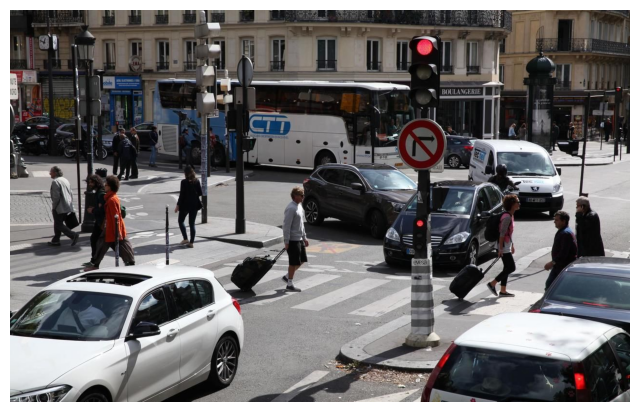

In [6]:
if online_image:
    image = url_img_read(path, show=True)
    image, image_data, shape = preprocess_image(img_path=image, model_image_size = yolo_shape, done=True)
else:
    image, image_data, shape = preprocess_image(img_path=path, model_image_size = yolo_shape, done=False)


#### __```Reading all classes and anchors```__

In [6]:
Class_names         = read_classes()
anchors             = read_anchors()

#### __```Hyper Parameters. You can change them```__

In [7]:
classes         : list = []
class_names     : list = []
score_threshold : float= 0.2    # in np.linkspace(0, 1)
response        : bool = False
file_type       : str  = 'image'
df              : dict = {'label' : [], 'score':[], 'top':[], "left":[], "bottom":[], 'right':[]}
response        : bool = False
alpha           : int  = 30     # in range(255)
with_names      : bool = True 
only_mask       : bool = True 
mode            : str  = 'gray' #----> ['gray', 'rgb']


#### __```Do not change this part of notebook.```__

In [8]:
if class_names: pass 
else: class_names = Class_names.copy()

kwargs = {
    "class_names"       : Class_names, 
    'image_file'        : [(image, image_data)],
    "Class_names"       : Class_names,
    "score_threshold"   : score_threshold,
    "anchors"           : anchors
}

#### __```Set color boxes. Do not change anything here```__

In [9]:
class_names = kwargs['Class_names']
colors_     = get_colors_for_classes(len(class_names) + 10)

def f():
    s = random.sample(range(50), 1)
    return s[0] 

def g():
    num = random.sample(range(len(colors_)), len(class_names))
    return num 

colors      = {class_names[j] : colors_[i] if colors_[i] != (255, 255, 0) else colors_[j-1] for j, i in enumerate(g())}

#### __```Image prediction. Do not change anything here```__

In [10]:
image_predicted = demo_seg(df=df, shape=shape, response=response, colors=colors, mode=mode,
                            alpha=alpha, with_names=with_names, only_mask=only_mask, **kwargs)


0: 640x640 16 persons, 8 cars, 2 buss, 1 truck, 4 traffic lights, 788.1ms
Speed: 42.0ms preprocess, 788.1ms inference, 134.9ms postprocess per image at shape (1, 3, 640, 640)


#### __```Resizing images```__

In [11]:
imgs = [ resize(image_data.reshape(yolo_shape+(3,)), output_shape=shape), image_predicted]
img_classes = ['True Label', 'Predicted Label']
n = 2

#### __```Results```__

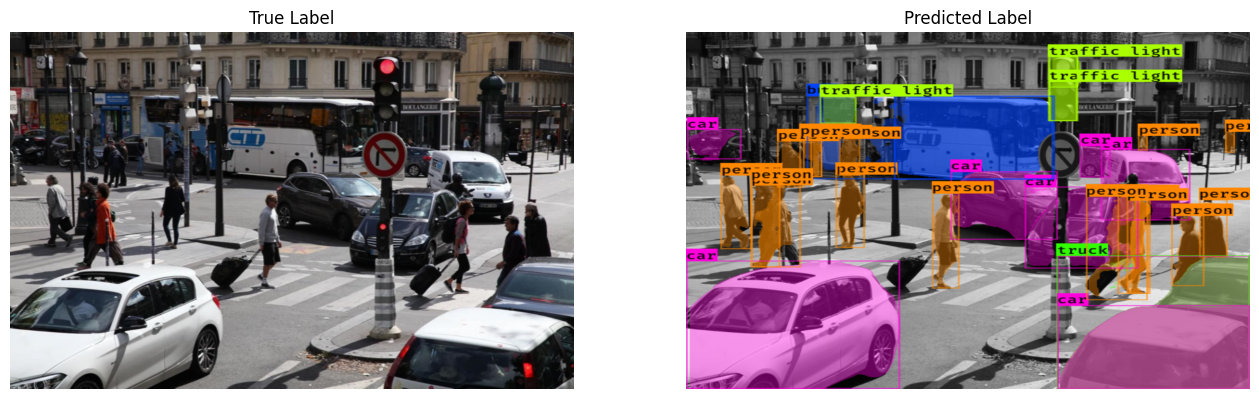

In [12]:

fig, ax = plt.subplots(1, n, figsize=(8 * n, 8))
for i in range(n):
    ax[i].axis('off')
    ax[i].imshow(imgs[i])
    ax[i].set_title(img_classes[i])
plt.show()

#### __```Using the dictionary generated by the prediction to see all classes included in the predicted image```__
----

In [13]:
data_frame = pd.DataFrame(df)
data_frame.rename(columns={'label':'classes'}, inplace=True)
data_frame['label'] = [1 for i in range(len(data_frame.iloc[:, 0]))]


#### __```Classes countplot```__

In [16]:
# colors
python_colors   = np.array( list( mcolors.CSS4_COLORS.keys() ) )
length          = len(set(df['label']))
indexes         = sample(range(python_colors.shape[0]), k=length)
unique_color    = list( python_colors[indexes] )
print(f"unique classes : {length}")

unique classes : 5


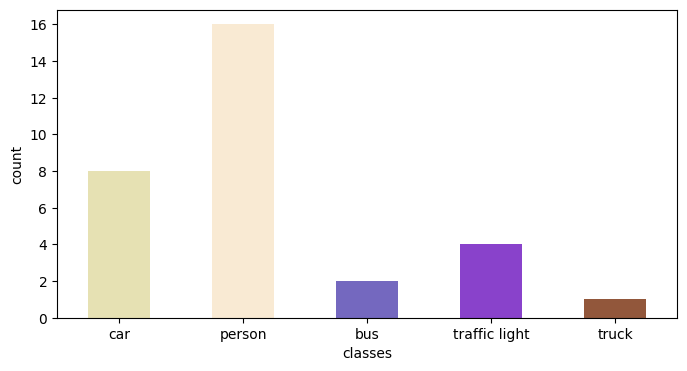

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(data=data_frame, x='classes', palette=unique_color, hue='classes', width=0.5)
plt.show()

#### __```Data Frame created wih :```__

* classes
* scores
* the score of prediction
* bonding boxes 
* the encoded classses

In [19]:
display(data_frame.tail())

,classes,score,top,left,bottom,right,label
26,person,0.29,176.169998,487.739990,201.059998,497.600006,1
27,person,0.29,178.509995,134.059998,246.110001,146.740005,1
28,traffic light,0.28,41.570000,391.450012,94.220001,422.619995,1
29,person,0.27,252.020004,70.279999,400.809998,101.639999,1
30,person,0.25,279.890015,431.010010,456.200012,497.980011,1


<img width="180px" height="200px" src="https://i.pinimg.com/originals/18/e1/11/18e1110635dc82318910603571fe4e5a.jpg"></img>